In [1]:
"""
Recreate all Woo et al 2016 diagrams

Author: Alan Nguyen

22-06-2020
"""

'\nRecreate all Woo et al 2016 diagrams\n\nAuthor: Alan Nguyen\n\n22-06-2020\n'

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.table import Table, Column
from scipy.optimize import curve_fit, leastsq
from astropy.cosmology import WMAP9 as cosmo
from astropy import units as u
import os
import math as m
from astropy import constants as const
import time
from BOSS_func_v9 import *
from general_functions_v1 import *

In [9]:
#we do seyfert only

In [3]:
hdul = fits.open('AGN_results_files\zbin1_results_v2.fits')

zbin1_results = hdul[1].data

hdul.close()

##################################################################################

hdul = fits.open('AGN_results_files\zbin2_results_v2.fits')

zbin2_results = hdul[1].data

hdul.close()

##################################################################################

hdul = fits.open('AGN_results_files\zbin3_results_v2.fits')

zbin3_results = hdul[1].data

hdul.close()

##################################################################################

hdul = fits.open('AGN_results_files\zbin4_results_v2.fits')

zbin4_results = hdul[1].data

hdul.close()

In [18]:
select_zbin1_2g = (zbin1_results['FLAG'] == 2) | (zbin1_results['FLAG'] == 3) #2g is two gaussian 
select_zbin2_2g = (zbin2_results['FLAG'] == 2) | (zbin2_results['FLAG'] == 3) #2g is two gaussian 
select_zbin3_2g = (zbin3_results['FLAG'] == 2) | (zbin3_results['FLAG'] == 3) #2g is two gaussian 
select_zbin4_2g = (zbin4_results['FLAG'] == 2) | (zbin4_results['FLAG'] == 3) #2g is two gaussian

##################################################################################

zbin1_2g = zbin1_results[select_zbin1_2g]
zbin2_2g = zbin2_results[select_zbin2_2g]
zbin3_2g = zbin3_results[select_zbin3_2g]
zbin4_2g = zbin4_results[select_zbin4_2g]

##################################################################################

zbin1_outflow_wing_veldis = zbin1_2g['WING_VELDIS']
zbin2_outflow_wing_veldis = zbin2_2g['WING_VELDIS']
zbin3_outflow_wing_veldis = zbin3_2g['WING_VELDIS']
zbin4_outflow_wing_veldis = zbin4_2g['WING_VELDIS']

zbin1_outflow_wing_logveldis = np.log10(zbin1_wing_veldis)
zbin2_outflow_wing_logveldis = np.log10(zbin2_wing_veldis)
zbin3_outflow_wing_logveldis = np.log10(zbin3_wing_veldis)
zbin4_outflow_wing_logveldis = np.log10(zbin4_wing_veldis)

##################################################################################


In [5]:
#here we reproduce woo et al fig 6
#need luminosity as well as vel shift

hdul = fits.open('AGN_zbin_fitsfiles\AGN_zbin1_v2.fits')

zbin1_data = hdul[1].data

hdul.close()

#########################################

hdul = fits.open('AGN_zbin_fitsfiles\AGN_zbin2_v2.fits')

zbin2_data = hdul[1].data

hdul.close()

#########################################

hdul = fits.open('AGN_zbin_fitsfiles\AGN_zbin3_v2.fits')

zbin3_data = hdul[1].data

hdul.close()

#########################################

hdul = fits.open('AGN_zbin_fitsfiles\AGN_zbin4_v2.fits')

zbin4_data = hdul[1].data

hdul.close()

##################################################################################

zbin1_OIII_flux = zbin1_data['FLUX'][:, 17]
zbin1_redshift  = zbin1_data['Z']

zbin2_OIII_flux = zbin2_data['FLUX'][:, 17]
zbin2_redshift  = zbin2_data['Z']

zbin3_OIII_flux = zbin3_data['FLUX'][:, 17]
zbin3_redshift  = zbin3_data['Z']

zbin4_OIII_flux = zbin4_data['FLUX'][:, 17]
zbin4_redshift  = zbin4_data['Z']

##################################################################################

zbin1_lum_dis = cosmo.luminosity_distance(zbin1_redshift)
zbin1_lum_dis = zbin1_lum_dis.to(u.cm)
zbin1_OIII_flux_correct_units = zbin1_OIII_flux * (10**(-17)) * (u.erg/(u.cm*u.cm*u.second))
zbin1_OIII_lum = 4 * np.pi * zbin1_OIII_flux_correct_units * (zbin1_lum_dis ** 2)

##################################################################################

zbin2_lum_dis = cosmo.luminosity_distance(zbin2_redshift)
zbin2_lum_dis = zbin2_lum_dis.to(u.cm)
zbin2_OIII_flux_correct_units = zbin2_OIII_flux * (10**(-17)) * (u.erg/(u.cm*u.cm*u.second))
zbin2_OIII_lum = 4 * np.pi * zbin2_OIII_flux_correct_units * (zbin2_lum_dis ** 2)

##################################################################################

zbin3_lum_dis = cosmo.luminosity_distance(zbin3_redshift)
zbin3_lum_dis = zbin3_lum_dis.to(u.cm)
zbin3_OIII_flux_correct_units = zbin3_OIII_flux * (10**(-17)) * (u.erg/(u.cm*u.cm*u.second))
zbin3_OIII_lum = 4 * np.pi * zbin3_OIII_flux_correct_units * (zbin3_lum_dis ** 2)

##################################################################################

zbin4_lum_dis = cosmo.luminosity_distance(zbin4_redshift)
zbin4_lum_dis = zbin4_lum_dis.to(u.cm)
zbin4_OIII_flux_correct_units = zbin4_OIII_flux * (10**(-17)) * (u.erg/(u.cm*u.cm*u.second))
zbin4_OIII_lum = 4 * np.pi * zbin4_OIII_flux_correct_units * (zbin4_lum_dis ** 2)

##################################################################################

zbin1_OIII_lum_array = np.array(zbin1_OIII_lum)
zbin2_OIII_lum_array = np.array(zbin2_OIII_lum)
zbin3_OIII_lum_array = np.array(zbin3_OIII_lum)
zbin4_OIII_lum_array = np.array(zbin4_OIII_lum)

##################################################################################

zbin1_OIII_lum_array = np.log10(zbin1_OIII_lum_array[select_zbin1_2g])
zbin2_OIII_lum_array = np.log10(zbin2_OIII_lum_array[select_zbin2_2g])
zbin3_OIII_lum_array = np.log10(zbin3_OIII_lum_array[select_zbin3_2g])
zbin4_OIII_lum_array = np.log10(zbin4_OIII_lum_array[select_zbin4_2g])

In [6]:
#fig 1 is the classifications

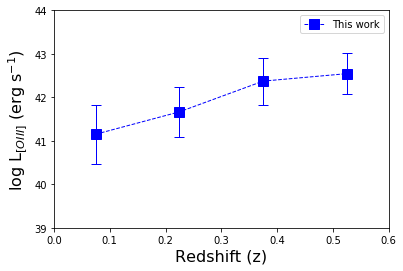

In [8]:
#fig 2 upper panel

plot_yaxis = np.zeros(4)
plot_yaxis[0] = np.mean(zbin1_OIII_lum_array)
plot_yaxis[1] = np.mean(zbin2_OIII_lum_array)
plot_yaxis[2] = np.mean(zbin3_OIII_lum_array)
plot_yaxis[3] = np.mean(zbin4_OIII_lum_array)

plot_xaxis = np.zeros(4)
plot_xaxis[0] = 0.075
plot_xaxis[1] = 0.225
plot_xaxis[2] = 0.375
plot_xaxis[3] = 0.525

plot_yerror = np.zeros(4)
plot_yerror[0] = np.std(zbin1_OIII_lum_array)
plot_yerror[1] = np.std(zbin2_OIII_lum_array)
plot_yerror[2] = np.std(zbin3_OIII_lum_array)
plot_yerror[3] = np.std(zbin4_OIII_lum_array)

plt.errorbar(plot_xaxis, plot_yaxis, plot_yerror, color = 'blue', linewidth = 1, linestyle = '--', marker = 's', ms = 10, capsize = 5, label = 'This work')

plt.xlim(0,0.6)
plt.ylim(39, 44)

plt.xlabel('Redshift (z)', fontsize = 16)
plt.ylabel(r'log L$_{[OIII]}$ (erg s$^{-1}$)', fontsize = 16)

plt.legend()

# plt.savefig('WooEtAl_Fig2Upper_Clone_v2.png')

plt.show()

#still don't know how to do eddington ratio (Lbol/Ledd) for lower panel

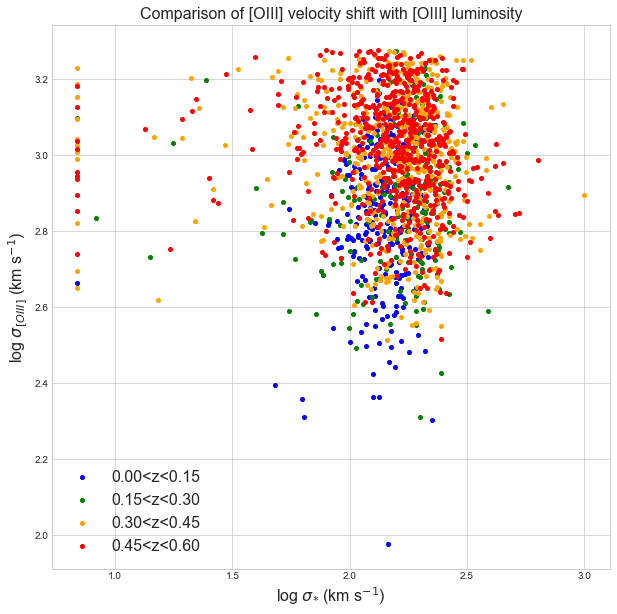

In [23]:
#fig 3
zbin1_sigstars = zbin1_data['SIGMA_STARS'][select_zbin1_2g]
zbin2_sigstars = zbin2_data['SIGMA_STARS'][select_zbin2_2g]
zbin3_sigstars = zbin3_data['SIGMA_STARS'][select_zbin3_2g]
zbin4_sigstars = zbin4_data['SIGMA_STARS'][select_zbin4_2g]

zbin1_logsigstars = np.log10(zbin1_sigstars)
zbin2_logsigstars = np.log10(zbin2_sigstars)
zbin3_logsigstars = np.log10(zbin3_sigstars)
zbin4_logsigstars = np.log10(zbin4_sigstars)

plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(10,10))

plt.plot(zbin1_logsigstars, zbin1_outflow_wing_logveldis, color = 'b', linestyle = '', marker = '.', ms = 8, label = '0.00<z<0.15')
plt.plot(zbin2_logsigstars, zbin2_outflow_wing_logveldis, color = 'g', linestyle = '', marker = '.', ms = 8, label = '0.15<z<0.30')
plt.plot(zbin3_logsigstars, zbin3_outflow_wing_logveldis, color = 'orange', linestyle = '', marker = '.', ms = 8, label = '0.30<z<0.45')
plt.plot(zbin4_logsigstars, zbin4_outflow_wing_logveldis, color = 'red',  linestyle = '', marker = '.', ms = 8, label = '0.45<z<0.60')

# plt.xlim(1, 3)
# plt.ylim(38.5, 44.5)

plt.title('Comparison of [OIII] velocity shift with [OIII] luminosity', fontsize = 16)
plt.ylabel(r'log $\sigma$$_{[OIII]}$ (km s$^{-1}$)', fontsize = 16)
plt.xlabel(r'log $\sigma$$_{*}$ (km s$^{-1}$)', fontsize = 16)
plt.legend(fontsize = 16)
# plt.savefig('WooEtAl_Fig6_Clone.png')
plt.show()